In [11]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

print(keras.__version__)

2.11.0
2.11.0


In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [13]:
# Wczytaj dane treningowe i testowe
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

train_set = pd.read_csv('adult.data', sep=", ",header = None)
test_set = pd.read_csv('adult.test', sep=", ",skiprows = 1, header = None) # Make sure to skip a row for the test set

col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 
              'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
             'wage_class']
train_set.columns = col_labels
test_set.columns = col_labels

train = train_set.replace('?', np.nan).dropna()
test = test_set.replace('?', np.nan).dropna()

train_set.head()


/var/folders/zy/jl2rn8kj7cx0g35_dvq0zksh0000gn/T/ipykernel_43726/1127659990.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  train_set = pd.read_csv('adult.data', sep=", ",header = None)
/var/folders/zy/jl2rn8kj7cx0g35_dvq0zksh0000gn/T/ipykernel_43726/1127659990.py:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  test_set = pd.read_csv('adult.test', sep=", ",skiprows = 1, header = None) # Make sure to skip a row for the test set


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Zad.
Zróbmy szybki preprocesing

In [14]:
dataset = pd.concat([train,test])

dataset['wage_class'] = dataset.wage_class.replace({'<=50K.': 0,'<=50K':0, '>50K.':1, '>50K':1})

dataset.drop(["fnlwgt"],axis=1,inplace=True)

dataset.drop(["education"],axis=1,inplace=True)

x = dataset.groupby('native_country')["wage_class"].mean()

d = dict(pd.cut(x[x.index!=" United-States"],5,labels=range(5)))

dataset['native_country'] = dataset['native_country'].replace(d)

dataset = pd.get_dummies(dataset,drop_first=True)

train = dataset.iloc[:train.shape[0]]
test = dataset.iloc[train.shape[0]:]

X_train = train.drop("wage_class",axis=1)
y_train = train.wage_class

X_test = test.drop("wage_class",axis=1)
y_test = test.wage_class

X_test = np.asarray(X_test).astype('float32')
y_test = np.asarray(y_test).astype('float32')
X_train = np.asarray(X_train).astype('float32')
y_train = np.asarray(y_train).astype('float32')

In [15]:
from keras.callbacks import ModelCheckpoint

In [16]:
from keras.models import Sequential
from keras.layers import Dense

from keras.callbacks import History

history = History()
model = Sequential()
model.add(Dense(100,activation="sigmoid",input_shape=(X_train.shape[1],)))
model.add(Dense(50,activation="sigmoid"))
model.add(Dense(10,activation="sigmoid"))
model.add(Dense(1,activation="sigmoid"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 100)               4200      
                                                                 
 dense_5 (Dense)             (None, 50)                5050      
                                                                 
 dense_6 (Dense)             (None, 10)                510       
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 9,771
Trainable params: 9,771
Non-trainable params: 0
_________________________________________________________________


In [17]:
save_best_model = ModelCheckpoint("wagi_best.h5py",save_best_only=True)
model.compile(loss="binary_crossentropy",optimizer="Adam", metrics=["accuracy"])

In [18]:
save_best_model = ModelCheckpoint("wagi_best.h5py",save_best_only=True)
history = model.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size=32,epochs=100, callbacks=[save_best_model])

Epoch 1/100
883/943 [===========================>..] - ETA: 0s - loss: 0.4278 - accuracy: 0.7925

INFO:tensorflow:Assets written to: wagi_best.h5py/assets


INFO:tensorflow:Assets written to: wagi_best.h5py/assets


943/943 [==============================] - 2s 1ms/step - loss: 0.4248 - accuracy: 0.7932 - val_loss: 0.3751 - val_accuracy: 0.8131
Epoch 2/100
943/943 [==============================] - 1s 927us/step - loss: 0.3762 - accuracy: 0.8112 - val_loss: 0.3806 - val_accuracy: 0.8045
Epoch 3/100
905/943 [===========================>..] - ETA: 0s - loss: 0.3743 - accuracy: 0.8126

INFO:tensorflow:Assets written to: wagi_best.h5py/assets


INFO:tensorflow:Assets written to: wagi_best.h5py/assets


943/943 [==============================] - 1s 1ms/step - loss: 0.3740 - accuracy: 0.8128 - val_loss: 0.3662 - val_accuracy: 0.8175
Epoch 4/100
943/943 [==============================] - 1s 923us/step - loss: 0.3713 - accuracy: 0.8137 - val_loss: 0.3704 - val_accuracy: 0.8113
Epoch 5/100
943/943 [==============================] - 1s 936us/step - loss: 0.3727 - accuracy: 0.8120 - val_loss: 0.3673 - val_accuracy: 0.8149
Epoch 6/100
892/943 [===========================>..] - ETA: 0s - loss: 0.3650 - accuracy: 0.8221

INFO:tensorflow:Assets written to: wagi_best.h5py/assets


INFO:tensorflow:Assets written to: wagi_best.h5py/assets


943/943 [==============================] - 1s 1ms/step - loss: 0.3642 - accuracy: 0.8223 - val_loss: 0.3511 - val_accuracy: 0.8319
Epoch 7/100
943/943 [==============================] - 1s 924us/step - loss: 0.3548 - accuracy: 0.8283 - val_loss: 0.3569 - val_accuracy: 0.8252
Epoch 8/100
943/943 [==============================] - 1s 919us/step - loss: 0.3550 - accuracy: 0.8287 - val_loss: 0.3580 - val_accuracy: 0.8240
Epoch 9/100
943/943 [==============================] - 1s 939us/step - loss: 0.3665 - accuracy: 0.8176 - val_loss: 0.3812 - val_accuracy: 0.8009
Epoch 10/100
943/943 [==============================] - 1s 978us/step - loss: 0.3728 - accuracy: 0.8115 - val_loss: 0.3735 - val_accuracy: 0.7972
Epoch 11/100
943/943 [==============================] - 1s 930us/step - loss: 0.3732 - accuracy: 0.8115 - val_loss: 0.3763 - val_accuracy: 0.8037
Epoch 12/100
943/943 [==============================] - 1s 915us/step - loss: 0.3717 - accuracy: 0.8128 - val_loss: 0.3654 - val_accuracy: 0.8

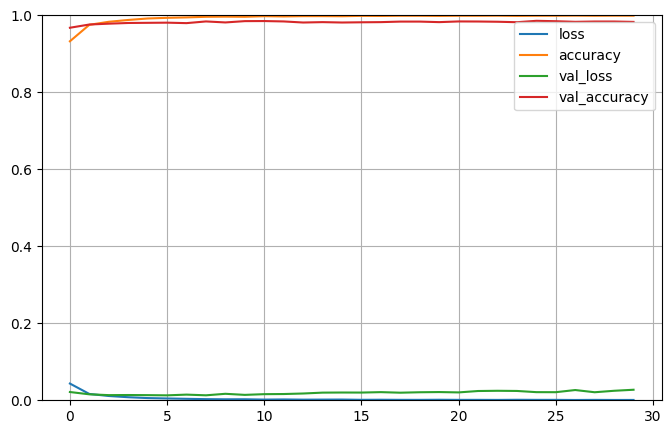

In [30]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [31]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 778us/step - loss: 0.0299 - accuracy: 0.9811


[0.029853597283363342, 0.9811000227928162]

In [32]:
from sklearn import  metrics
metrics.accuracy_score(y_true= y_test, y_pred = np.argmax(model.predict(X_test),axis=1) )

313/313 [==============================] - 0s 684us/step


ValueError: Classification metrics can't handle a mix of multilabel-indicator and multiclass targets

# Zad

Wczytaj nauczony model

In [23]:
model.load_weights("wagi_best.h5py")
model.evaluate(X_test,y_test)

197/471 [===========>..................] - ETA: 0s - loss: 0.3521 - accuracy: 0.8325

2023-06-10 10:11:54.250917: W tensorflow/core/util/tensor_slice_reader.cc:96] Could not open wagi_best.h5py: FAILED_PRECONDITION: wagi_best.h5py; Is a directory: perhaps your file is in a different file format and you need to use a different restore operator?


471/471 [==============================] - 0s 515us/step - loss: 0.3511 - accuracy: 0.8319


[0.3511364161968231, 0.8318725228309631]

# Zad

* Naucz dowolny model na zbiorze MNIST.
* Zapisz optymalne parametry uczenia do pliku
* Wczytaj dane z pliku

In [25]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

from keras.utils import np_utils
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

y_valid = np_utils.to_categorical(y_valid)


In [29]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

model.summary()


save_best_model = ModelCheckpoint("wagi_best_mnist.h5py",save_best_only=True)
model.compile(loss="binary_crossentropy",optimizer="Adam", metrics=["accuracy"])
save_best_model = ModelCheckpoint("wagi_best_mnist.h5py",save_best_only=True)

history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0435 - accuracy: 0.9325 - val_loss: 0.0215 - val_accuracy: 0.9676
Epoch 2/30
1719/1719 [================

In [34]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 784us/step - loss: 0.0299 - accuracy: 0.9811


[0.029853597283363342, 0.9811000227928162]

In [35]:
model.load_weights("wagi_best_mnist.h5py")
model.evaluate(X_test,y_test)

NotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for wagi_best_mnist.h5py